<a href="https://colab.research.google.com/github/celelunar/Indonesian-Poverty-Ratio-Time-Series-Prediction/blob/main/Indonesian%20Poverty%20Ratio%20Time%20Series%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install Packages and Import Libraries**

In [ ]:
install.packages('tseries')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’




In [ ]:
install.packages("Metrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’




In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [ ]:
install.packages("nortest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("TSA")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’




In [ ]:
install.packages("nnfor")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘texreg’, ‘greybox’, ‘pracma’, ‘statmod’, ‘xtable’, ‘iterators’, ‘smooth’, ‘foreach’, ‘shape’, ‘MAPA’, ‘glmnet’, ‘neuralnet’, ‘plotrix’, ‘tsutils’, ‘uroot’




In [ ]:
library(tseries)
library(readxl)
library(dplyr)

library(nortest)
library(lmtest)
library(car)

library(forecast)
library(nnfor)
library(TTR)
library(TSA)

library(Metrics)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


Loading required package: generics


Attaching package: ‘generics’


The following object is masked from ‘package:dplyr’:

    explain


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union


Registered S3 methods overwritten by 'tsutils':
  method          from   
  print.nemenyi   greybox
  summary.nemenyi greybox

Registered S

## **Data Preparation**

### Read the Data

In [ ]:
poverty <- read_excel("poverty.xls", sheet = "Indonesia")
head(poverty)

Year,Poverty Ratio (%)
<dbl>,<dbl>
1998,69.1
1999,46.0
2000,43.6
2001,39.9
2002,26.8
2003,26.4


### Data Splitting

In [ ]:
len = length(poverty$`Poverty Ratio (%)`)
len

[1] 26

In [ ]:
n_train = floor(len*0.7)
n_train

[1] 18

In [ ]:
df_train = poverty[1:n_train, ]
head(df_train)

Year,Poverty Ratio (%)
<dbl>,<dbl>
1998,69.1
1999,46.0
2000,43.6
2001,39.9
2002,26.8
2003,26.4


In [ ]:
df_test = poverty[(n_train+1):len, ]
head(df_test)

Year,Poverty Ratio (%)
<dbl>,<dbl>
2016,7.5
2017,6.6
2018,5.4
2019,4.4
2020,3.8
2021,3.5


### Convert Data to Time Series Format

In [ ]:
training = ts(df_train[2], start = 1998, end = 2015, frequency = 1)
head(training)

Poverty Ratio (%)
69.1
46.0
43.6
39.9
26.8
26.4


In [ ]:
testing = ts(df_test[2], start = 2016, end = 2023, frequency = 1)
head(testing)

Poverty Ratio (%)
7.5
6.6
5.4
4.4
3.8
3.5


### Plotting the Data

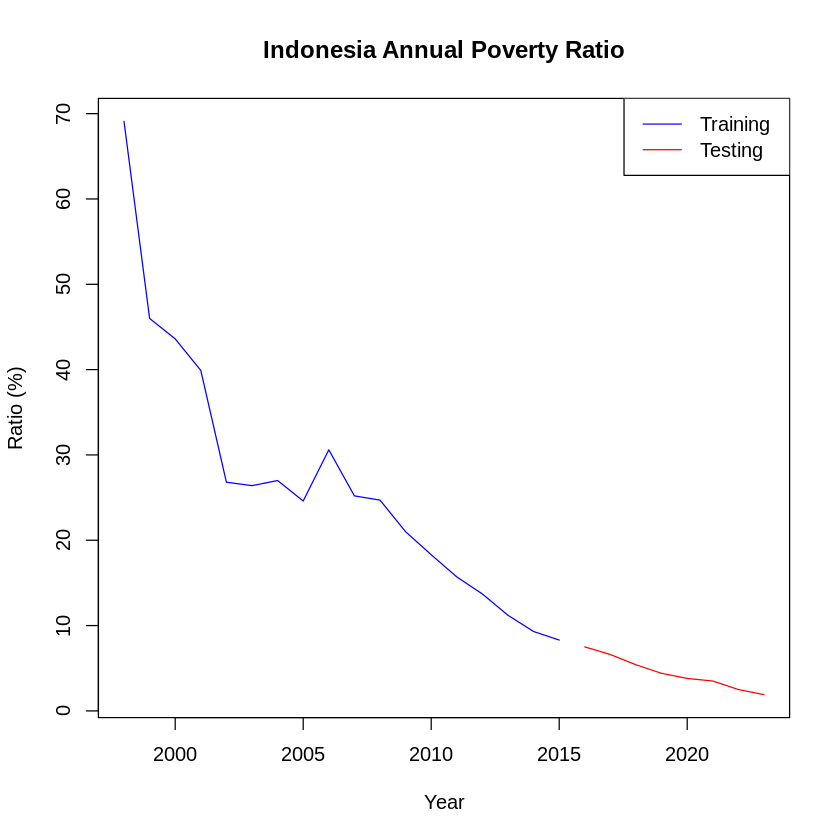

In [ ]:
# Determine the range for the x-axis
y_range <- range(c(training, testing))
x_range <- c(1998, 2023)

# Plot the training data
plot(training, type = "l", col = "blue", xlim = x_range, ylim = y_range,
     xlab = "Year", ylab = "Ratio (%)", main = "Indonesia Annual Poverty Ratio")

# Add the testing data to the same plot
lines(testing, col = "red")

# Add a legend to differentiate between training and testing data
legend("topright", legend = c("Training", "Testing"),
       col = c("blue", "red"), lty = 1)

### Other Preparations

In [ ]:
# Evaluation Metrics' Name
eval_names = c("RMSE", "MAE", "MAPE", "MDAE")

## **Modelling**

### Naive Model [DONE]

#### Model 1

In [ ]:
model_naive_1 <- function(training, h) {
  forecast_values <- numeric(h)
  last_value <- training[length(training)]
  drift <- training[length(training)] - training[length(training) - 1]

  for (i in 1:h) {
    forecast_values[i] <- last_value + drift
    last_value <- forecast_values[i]
  }

  return(forecast_values)
}

In [ ]:
fit_naive_1 <- numeric(length(training))
fit_naive_1[1] <- training[1]

for (i in 2:length(training)) {
  if (i == 2) {
    drift <- 0
  } else {
    drift <- training[i-1] - training[i-2]
  }
  fit_naive_1[i] <- training[i-1] + drift
}

fit_naive_1

[1] 69.1 69.1 22.9 41.2 36.2 13.7 26.0 27.6 22.2 36.6 19.8 24.2 17.3 15.6 13.1
[16] 11.7  8.7  7.4

##### Model Evaluation

In [ ]:
rmse_model_naive_1 = rmse(training, fit_naive_1)
mae_model_naive_1 = mae(training, fit_naive_1)
mape_model_naive_1 = mape(training, fit_naive_1)
mdae_model_naive_1 = mdae(training, fit_naive_1)

eval_model_naive_1 = c(rmse_model_naive_1, mae_model_naive_1, mape_model_naive_1, mdae_model_naive_1)

data.frame(eval_names, eval_model_naive_1)

eval_names,eval_model_naive_1
<chr>,<dbl>
RMSE,9.0092545
MAE,5.7111111
MAPE,0.1889098
MDAE,2.1500000


##### Testing Prediction & Evaluation

In [ ]:
predict_values_naive_1 = model_naive_1(training, length(testing))
predict_values_naive_1

[1] 7.3 6.3 5.3 4.3 3.3 2.3 1.3 0.3

In [ ]:
rmse_naive_1 = rmse(testing, predict_values_naive_1)
mae_naive_1 = mae(testing, predict_values_naive_1)
mape_naive_1 = mape(testing, predict_values_naive_1)
mdae_naive_1 = mdae(testing, predict_values_naive_1)

eval_naive_1 = c(rmse_naive_1, mae_naive_1, mape_naive_1, mdae_naive_1)

data.frame(eval_names, eval_naive_1)

eval_names,eval_naive_1
<chr>,<dbl>
RMSE,0.8544004
MAE,0.6500000
MAPE,0.2387385
MDAE,0.4000000


##### Forecast 1 year

In [ ]:
forecast_naive_1 = tail(model_naive_1(training, length(testing)+1), 1)
forecast_naive_1

[1] -0.7

#### Model 2

In [ ]:
model_naive_2 <- function(train, h) {
  last_value <- train[length(train)]
  growth_rate <- train[length(train)] / train[length(train) - 1]
  forecast_values <- numeric(h)
  forecast_values[1] <- last_value * growth_rate
  for (i in 2:h) {
    forecast_values[i] <- forecast_values[i - 1] * growth_rate
  }
  return(forecast_values)
}

In [ ]:
window_size = 2

fit_naive_2 <- numeric(length(training) - window_size)
fit_naive_2[1] = training[1]
fit_naive_2[2] = training[2]

for (i in (window_size + 1):length(training)) {
  growth_rate = training[i-1] / training[i-window_size]
  fit_naive_2[i] = training[i - 1] * growth_rate
}

fit_naive_2

[1] 69.100000 46.000000 30.622287 41.325217 36.513991 18.001003 26.005970
 [8] 27.613636 22.413333 38.063415 20.752941 24.209921 17.854251 15.947143
[15] 13.469399 11.954777  9.156204  7.722321

##### Model Evaluation

In [ ]:
rmse_model_naive_2 = rmse(training, fit_naive_2)
mae_model_naive_2 = mae(training, fit_naive_2)
mape_model_naive_2 = mape(training, fit_naive_2)
mdae_model_naive_2 = mdae(training, fit_naive_2)

eval_model_naive_2 = c(rmse_model_naive_2, mae_model_naive_2, mape_model_naive_2, mdae_model_naive_2)

data.frame(eval_names, eval_model_naive_2)

eval_names,eval_model_naive_2
<chr>,<dbl>
RMSE,5.7976816
MAE,3.7294661
MAPE,0.1374072
MDAE,1.2096236


##### Testing Prediction & Evaluation

In [ ]:
predict_values_naive_2 = model_naive_2(training, length(testing))
predict_values_naive_2

[1] 7.407527 6.611019 5.900156 5.265731 4.699523 4.194198 3.743209 3.340714

In [ ]:
rmse_naive_2 = rmse(testing, predict_values_naive_2)
mae_naive_2 = mae(testing, predict_values_naive_2)
mape_naive_2 = mape(testing, predict_values_naive_2)
mdae_naive_2 = mdae(testing, predict_values_naive_2)

eval_naive_2 = c(rmse_naive_2, mae_naive_2, mape_naive_2, mdae_naive_2)

data.frame(eval_names, eval_naive_2)

eval_names,eval_naive_2
<chr>,<dbl>
RMSE,0.8602759
MAE,0.7183779
MAPE,0.2492489
MDAE,0.7799646


##### Forecast 1 Year

In [ ]:
forecast_naive_2 = tail(model_naive_2(training, length(testing)+1), 1)
forecast_naive_2

[1] 2.981497

### Double Moving Average (DMA) Model [DONE]

In [ ]:
DMA <- function(data, n){
  data_sma = SMA(data, n)
  dma = SMA(data_sma, n)

  At = 2*data_sma - dma
  Bt = 2/(n-1)*(data_sma - dma)

  data_dma = At + Bt
  data_predict = c(NA, data_dma)

  t = 1:9
  f = c()

  for (i in t) {
    f[i] = At[length(At)] + Bt[length(Bt)] * i
  }

  data_res = cbind(actual = c(training, rep(NA,9)), SMA = c(data_sma,rep(NA,9)), DMA = c(data_dma, rep(NA,9)), At = c(At, rep(NA,9)), Bt = c(Bt,rep(NA,9)), prediction = c(data_predict, f[-1]))

  return (data_res)
}

#### Model 1 (n = 3)

In [ ]:
model_dma_1 = DMA(training, 3)
model_dma_1

actual,SMA,DMA,At,Bt,prediction
69.1,NA,NA,NA,NA,NA
46.0,NA,NA,NA,NA,NA
43.6,52.90000,NA,NA,NA,NA
39.9,43.16667,NA,NA,NA,NA
26.8,36.76667,21.744444,29.255556,-7.51111111,NA
26.4,31.03333,19.122222,25.077778,-5.95555556,21.74444444
27.0,26.73333,17.177778,21.955556,-4.77777778,19.12222222
24.6,26.00000,22.155556,24.077778,-1.92222222,17.17777778
30.6,27.40000,28.777778,28.088889,0.68888889,22.15555556
25.2,26.80000,26.933333,26.866667,0.06666667,28.77777778


##### Model Evaluation

In [ ]:
fit_dma_1 = model_dma_1[6:n_train, 6]
fit_dma_1

[1] 21.744444 19.122222 17.177778 22.155556 28.777778 26.933333 26.477778
 [8] 19.388889 16.133333 12.800000 10.655556  8.755556  6.977778

In [ ]:
rmse_model_dma_1 = rmse(training[6:n_train], fit_dma_1)
mae_model_dma_1 = mae(training[6:n_train], fit_dma_1)
mape_model_dma_1 = mape(training[6:n_train], fit_dma_1)
mdae_model_dma_1 = mdae(training[6:n_train], fit_dma_1)

eval_model_dma_1 = c(rmse_model_dma_1, mae_model_dma_1, mape_model_dma_1, mdae_model_dma_1)

data.frame(eval_names, eval_model_dma_1)

eval_names,eval_model_dma_1
<chr>,<dbl>
RMSE,4.4931614
MAE,3.4247863
MAPE,0.1506376
MDAE,2.2333333


##### Testing Prediction and Evaluation

In [ ]:
predict_values_dma_1 = model_dma_1[(n_train+1):len, 6]
predict_values_dma_1

[1]  5.77777778  3.86666667  1.95555556  0.04444444 -1.86666667 -3.77777778
[7] -5.68888889 -7.60000000

In [ ]:
rmse_dma_1 = rmse(testing, predict_values_dma_1)
mae_dma_1 = mae(testing, predict_values_dma_1)
mape_dma_1 = mape(testing, predict_values_dma_1)
mdae_dma_1 = mdae(testing, predict_values_dma_1)

eval_dma_1 = c(rmse_dma_1, mae_dma_1, mape_dma_1, mdae_dma_1)

data.frame(eval_names, eval_dma_1)

eval_names,eval_dma_1
<chr>,<dbl>
RMSE,5.954592
MAE,5.361111
MAPE,1.764710
MDAE,5.011111


#### Forecast 1 Year

In [ ]:
forecast_dma_1 = model_dma_1[(len+1), 6]
forecast_dma_1

prediction 
 -9.511111

#### Model 2 (n = 4)

In [ ]:
model_dma_2 = DMA(training, 4)
model_dma_2

actual,SMA,DMA,At,Bt,prediction
69.1,NA,NA,NA,NA,NA
46.0,NA,NA,NA,NA,NA
43.6,NA,NA,NA,NA,NA
39.9,49.650,NA,NA,NA,NA
26.8,39.075,NA,NA,NA,NA
26.4,34.175,NA,NA,NA,NA
27.0,30.025,16.347917,21.81875,-5.4708333,NA
24.6,26.200,15.918750,20.03125,-4.1125000,16.3479167
30.6,27.150,23.420833,24.91250,-1.4916667,15.9187500
25.2,26.850,25.672917,26.14375,-0.4708333,23.4208333


##### Model Evaluation

In [ ]:
fit_dma_2 = model_dma_2[8:n_train, 6]
fit_dma_2

[1] 16.34792 15.91875 23.42083 25.67292 25.70208 23.64583 17.46667 14.01875
 [9] 10.47708  8.38125  6.47500

In [ ]:
rmse_model_dma_2 = rmse(training[8:n_train], fit_dma_2)
mae_model_dma_2 = mae(training[8:n_train], fit_dma_2)
mape_model_dma_2 = mape(training[8:n_train], fit_dma_2)
mdae_model_dma_2 = mdae(training[8:n_train], fit_dma_2)

eval_model_dma_2 = c(rmse_model_dma_2, mae_model_dma_2, mape_model_dma_2, mdae_model_dma_2)

data.frame(eval_names, eval_model_dma_2)

eval_names,eval_model_dma_2
<chr>,<dbl>
RMSE,5.6113161
MAE,3.7532197
MAPE,0.1782055
MDAE,1.7791667


##### Testing Prediction and Evaluation

In [ ]:
predict_values_dma_2 = model_dma_2[(n_train+1):len, 6]
predict_values_dma_2

[1]  5.4166667  3.3333333  1.2500000 -0.8333333 -2.9166667 -5.0000000 -7.0833333
[8] -9.1666667

In [ ]:
rmse_dma_2 = rmse(testing, predict_values_dma_2)
mae_dma_2 = mae(testing, predict_values_dma_2)
mape_dma_2 = mape(testing, predict_values_dma_2)
mdae_dma_2 = mdae(testing, predict_values_dma_2)

eval_dma_2 = c(rmse_dma_2, mae_dma_2, mape_dma_2, mdae_dma_2)

data.frame(eval_names, eval_dma_2)

eval_names,eval_dma_2
<chr>,<dbl>
RMSE,6.993717
MAE,6.325000
MAPE,2.073081
MDAE,5.975000


#### Forecast 1 Year

In [ ]:
forecast_dma_2 = model_dma_2[(len+1), 6]
forecast_dma_2

prediction 
    -11.25

#### Model 3 (n = 5)

In [ ]:
model_dma_3 = DMA(training, 5)
model_dma_3

actual,SMA,DMA,At,Bt,prediction
69.1,NA,NA,NA,NA,NA
46.0,NA,NA,NA,NA,NA
43.6,NA,NA,NA,NA,NA
39.9,NA,NA,NA,NA,NA
26.8,45.08,NA,NA,NA,NA
26.4,36.54,NA,NA,NA,NA
27.0,32.74,NA,NA,NA,NA
24.6,28.94,NA,NA,NA,NA
30.6,27.08,16.586,20.084,-3.498,NA
25.2,26.76,21.282,23.108,-1.826,16.586


##### Model Evaluation

In [ ]:
fit_dma_3 = model_dma_3[10:n_train, 6]
fit_dma_3

[1] 16.586 21.282 23.468 22.724 21.068 15.448 12.122  8.504  6.128

In [ ]:
rmse_model_dma_3 = rmse(training[10:n_train], fit_dma_3)
mae_model_dma_3 = mae(training[10:n_train], fit_dma_3)
mape_model_dma_3 = mape(training[10:n_train], fit_dma_3)
mdae_model_dma_3 = mdae(training[10:n_train], fit_dma_3)

eval_model_dma_3 = c(rmse_model_dma_3, mae_model_dma_3, mape_model_dma_3, mdae_model_dma_3)

data.frame(eval_names, eval_model_dma_3)

eval_names,eval_model_dma_3
<chr>,<dbl>
RMSE,4.0772912
MAE,3.3255556
MAPE,0.1931756
MDAE,2.4680000


##### Testing Prediction and Evaluation

In [ ]:
predict_values_dma_3 = model_dma_3[(n_train+1):len, 6]
predict_values_dma_3

[1]   4.824   2.552   0.280  -1.992  -4.264  -6.536  -8.808 -11.080

In [ ]:
rmse_dma_3 = rmse(testing, predict_values_dma_3)
mae_dma_3 = mae(testing, predict_values_dma_3)
mape_dma_3 = mape(testing, predict_values_dma_3)
mdae_dma_3 = mdae(testing, predict_values_dma_3)

eval_dma_3 = c(rmse_dma_3, mae_dma_3, mape_dma_3, mdae_dma_3)

data.frame(eval_names, eval_dma_3)

eval_names,eval_dma_3
<chr>,<dbl>
RMSE,8.312039
MAE,7.578000
MAPE,2.464415
MDAE,7.228000


#### Forecast 1 Year

In [ ]:
forecast_dma_3 = model_dma_3[(len+1), 6]
forecast_dma_3

prediction 
   -13.352

### Double Exponential Smoothing (DES) Model [DONE]

#### Model 1 (AAN)

In [ ]:
model_des_1 = ets(training, model = "AAN")
summary(model_des_1)

ETS(A,Ad,N) 

Call:
 ets(y = training, model = "AAN") 

  Smoothing parameters:
    alpha = 0.6395 
    beta  = 1e-04 
    phi   = 0.8027 

  Initial states:
    l = 79.0694 
    b = -17.0788 

  sigma:  5.1886

     AIC     AICc      BIC 
117.4419 125.0783 122.7841 

Training set error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.1787189 4.409477 3.532705 -4.644224 14.85858 0.8115674
                    ACF1
Training set -0.05435224

In [ ]:
fit_des_1 = model_des_1$fitted
fit_des_1

y
65.360629
56.748586
41.041819
35.587936
32.655008
24.342610
21.991774
22.251904
21.391716
25.385416


##### Model Evaluation

In [ ]:
rmse_model_des_1 = rmse(training, fit_des_1)
mae_model_des_1 = mae(training, fit_des_1)
mape_model_des_1 = mape(training, fit_des_1)
mdae_model_des_1 = mdae(training, fit_des_1)

eval_model_des_1 = c(rmse_model_des_1, mae_model_des_1, mape_model_des_1, mdae_model_des_1)

data.frame(eval_names, eval_model_des_1)

eval_names,eval_model_des_1
<chr>,<dbl>
RMSE,4.4094769
MAE,3.5327050
MAPE,0.1485858
MDAE,2.5369078


##### Testing Data Prediction

In [ ]:
predict_des_1 = forecast(model_des_1, h = length(testing))
predict_des_1

     Point Forecast      Lo 80    Hi 80      Lo 95    Hi 95
2016       8.606611  1.9571303 15.25609  -1.562892 18.77611
2017       8.395645  0.5024376 16.28885  -3.675974 20.46726
2018       8.226307 -0.7399346 17.19255  -5.486376 21.93899
2019       8.090383 -1.8336874 18.01445  -7.087173 23.26794
2020       7.981281 -2.8160903 18.77865  -8.531873 24.49443
2021       7.893707 -3.7115142 19.49893  -9.854947 25.64236
2022       7.823413 -4.5370316 20.18386 -11.080256 26.72708
2023       7.766990 -5.3051655 20.83915 -12.225147 27.75913

In [ ]:
predict_values_des_1 = predict_des_1$mean
predict_values_des_1

A Time Series:
[1] 8.606611 8.395645 8.226307 8.090383 7.981281 7.893707 7.823413 7.766990

##### Prediction Evaluation

In [ ]:
rmse_des_1 = rmse(testing, predict_values_des_1)
mae_des_1 = mae(testing, predict_values_des_1)
mape_des_1 = mape(testing, predict_values_des_1)
mdae_des_1 = mdae(testing, predict_values_des_1)

eval_des_1 = c(rmse_des_1, mae_des_1, mape_des_1, mdae_des_1)

data.frame(eval_names, eval_des_1)

eval_names,eval_des_1
<chr>,<dbl>
RMSE,3.962385
MAE,3.648042
MAPE,1.169333
MDAE,3.935832


##### Forecast 1 year

In [ ]:
forecast_des_1 = forecast(model_des_1, h = length(testing)+1)$mean[length(testing)+1]
forecast_des_1

[1] 7.721701

#### Model 2 (MAN)

In [ ]:
model_des_2 = ets(training, model = "MAN")
summary(model_des_2)

ETS(M,A,N) 

Call:
 ets(y = training, model = "MAN") 

  Smoothing parameters:
    alpha = 0.9357 
    beta  = 1e-04 

  Initial states:
    l = 68.6402 
    b = -1.8804 

  sigma:  0.1614

     AIC     AICc      BIC 
106.0563 111.0563 110.5082 

Training set error measures:
                    ME    RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set -1.573678 6.10271 3.302282 -4.426504 10.72965 0.7586323 -0.1174408

In [ ]:
fit_des_2 = model_des_2$fitted
fit_des_2

y
66.759770
67.069458
45.471501
41.837780
38.141845
25.644952
24.467762
24.953824
22.739228
28.212200


##### Model Evaluation

In [ ]:
rmse_model_des_2 = rmse(training, fit_des_2)
mae_model_des_2 = mae(training, fit_des_2)
mape_model_des_2 = mape(training, fit_des_2)
mdae_model_des_2 = mdae(training, fit_des_2)

eval_model_des_2 = c(rmse_model_des_2, mae_model_des_2, mape_model_des_2, mdae_model_des_2)

data.frame(eval_names, eval_model_des_2)

eval_names,eval_model_des_2
<chr>,<dbl>
RMSE,6.1027097
MAE,3.3022816
MAPE,0.1072965
MDAE,1.4650736


##### Testing Data Prediction

In [ ]:
predict_des_2 = forecast(model_des_2, h = length(testing))
predict_des_2

     Point Forecast      Lo 80      Hi 80       Lo 95      Hi 95
2016      6.3602345  5.0443410  7.6761280   4.3477490  8.3727200
2017      4.4769908  2.9232804  6.0307012   2.1007957  6.8531858
2018      2.5937471  0.9655969  4.2218972   0.1037063  5.0837878
2019      0.7105033 -0.9319742  2.3529809  -1.8014493  3.2224560
2020     -1.1727404 -2.8508557  0.5053749  -3.7391962  1.3937154
2021     -3.0559841 -4.8652347 -1.2467336  -5.8229941 -0.2889742
2022     -4.9392278 -7.0232974 -2.8551583  -8.1265372 -1.7519185
2023     -6.8224716 -9.3336295 -4.3113136 -10.6629562 -2.9819869

In [ ]:
predict_values_des_2 = predict_des_2$mean
predict_values_des_2

A Time Series:
[1]  6.3602345  4.4769908  2.5937471  0.7105033 -1.1727404 -3.0559841 -4.9392278
[8] -6.8224716

##### Prediction Evaluation

In [ ]:
rmse_des_2 = rmse(testing, predict_values_des_2)
mae_des_2 = mae(testing, predict_values_des_2)
mape_des_2 = mape(testing, predict_values_des_2)
mdae_des_2 = mdae(testing, predict_values_des_2)

eval_des_2 = c(rmse_des_2, mae_des_2, mape_des_2, mdae_des_2)

data.frame(eval_names, eval_des_2)

eval_names,eval_des_2
<chr>,<dbl>
RMSE,5.320084
MAE,4.681119
MAPE,1.572507
MDAE,4.331119


##### Forecast 1 year

In [ ]:
forecast_des_2 = forecast(model_des_2, h = length(testing)+1)$mean[length(testing)+1]
forecast_des_2

[1] -8.705715

#### Model 3 (MMN)

In [ ]:
model_des_3 = ets(training, model = "MMN")
summary(model_des_3)

ETS(M,M,N) 

Call:
 ets(y = training, model = "MMN") 

  Smoothing parameters:
    alpha = 0.8221 
    beta  = 1e-04 

  Initial states:
    l = 62.2525 
    b = 0.8995 

  sigma:  0.1656

     AIC     AICc      BIC 
106.1428 111.1428 110.5947 

Training set error measures:
                       ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.007503519 5.512443 3.271676 -1.900042 10.31135 0.7516012
                   ACF1
Training set -0.3516755

In [ ]:
fit_des_3 = model_des_3$fitted
fit_des_3

y
55.995444
60.058919
43.626399
39.221942
35.781158
25.542997
23.608885
23.743373
21.990293
26.147485


##### Model Evaluation

In [ ]:
rmse_model_des_3 = rmse(training, fit_des_3)
mae_model_des_3 = mae(training, fit_des_3)
mape_model_des_3 = mape(training, fit_des_3)
mdae_model_des_3 = mdae(training, fit_des_3)

eval_model_des_3 = c(rmse_model_des_3, mae_model_des_3, mape_model_des_3, mdae_model_des_3)

data.frame(eval_names, eval_model_des_3)

eval_names,eval_model_des_3
<chr>,<dbl>
RMSE,5.5124434
MAE,3.2716759
MAPE,0.1031135
MDAE,0.9324174


##### Testing Prediction

In [ ]:
predict_des_3 = forecast(model_des_3, h = length(testing))
predict_des_3

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2016       7.501034 5.968766 9.149230 5.095571 9.961029
2017       6.747114 4.994798 8.685688 4.200664 9.847763
2018       6.068971 4.291319 8.176473 3.488158 9.510851
2019       5.458986 3.649351 7.616891 2.851251 9.072707
2020       4.910310 3.116946 7.130902 2.409185 8.605160
2021       4.416781 2.646128 6.511958 2.013537 8.060397
2022       3.972856 2.262726 6.032796 1.739993 7.483179
2023       3.573550 1.953977 5.482761 1.461152 7.098707

In [ ]:
predict_values_des_3 = predict_des_3$mean
predict_values_des_3

A Time Series:
[1] 7.501034 6.747114 6.068971 5.458986 4.910310 4.416781 3.972856 3.573550

##### Prediction Evaluation

In [ ]:
rmse_des_3 = rmse(testing, predict_values_des_3)
mae_des_3 = mae(testing, predict_values_des_3)
mape_des_3 = mape(testing, predict_values_des_3)
mdae_des_3 = mdae(testing, predict_values_des_3)

eval_des_3 = c(rmse_des_3, mae_des_3, mape_des_3, mdae_des_3)

data.frame(eval_names, eval_des_3)

eval_names,eval_des_3
<chr>,<dbl>
RMSE,1.0388677
MAE,0.8812004
MAPE,0.3013841
MDAE,0.9878838


##### Forecast 1 year

In [ ]:
forecast_des_3 = forecast(model_des_3, h = length(testing)+1)$mean[length(testing)+1]
forecast_des_3

[1] 3.214377

### Autoregressive Integrated Moving Average (ARIMA) Model [DONE]

#### Stationary Test

##### To Variance

In [ ]:
powerTransform(training)
summary(powerTransform(training))

Estimated transformation parameter 
  training 
0.08380007 

bcPower Transformation to Normality 
         Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
training    0.0838           0      -0.6791       0.8467

Likelihood ratio test that transformation parameter is equal to 0
 (log transformation)
                             LRT df    pval
LR test, lambda = (0) 0.04617853  1 0.82985

Likelihood ratio test that no transformation is needed
                           LRT df     pval
LR test, lambda = (1) 5.547279  1 0.018509

In [ ]:
# Transform the data since it does not satisfy the stationary to variance assumption
transformed = log(training)
head(transformed)

Poverty Ratio (%)
4.235555
3.828641
3.775057
3.686376
3.288402
3.273364


In [ ]:
powerTransform(transformed)
summary(powerTransform(transformed))

Estimated transformation parameter 
transformed 
   1.178734 

bcPower Transformation to Normality 
            Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
transformed    1.1787           1      -1.1921       3.5496

Likelihood ratio test that transformation parameter is equal to 0
 (log transformation)
                            LRT df    pval
LR test, lambda = (0) 0.9523775  1 0.32911

Likelihood ratio test that no transformation is needed
                             LRT df    pval
LR test, lambda = (1) 0.02185912  1 0.88246

##### To Mean

In [ ]:
adf.test(transformed)


	Augmented Dickey-Fuller Test

data:  transformed
Dickey-Fuller = -1.2763, Lag order = 2, p-value = 0.8481
alternative hypothesis: stationary


In [ ]:
diff1 = diff(transformed)
adf.test(diff1)


	Augmented Dickey-Fuller Test

data:  diff1
Dickey-Fuller = -1.238, Lag order = 2, p-value = 0.8627
alternative hypothesis: stationary


In [ ]:
diff2 = diff(transformed, differences = 2)
adf.test(diff2)


	Augmented Dickey-Fuller Test

data:  diff2
Dickey-Fuller = -2.3205, Lag order = 2, p-value = 0.4503
alternative hypothesis: stationary


In [ ]:
diff3 = diff(transformed, differences = 3)
adf.test(diff3)


	Augmented Dickey-Fuller Test

data:  diff3
Dickey-Fuller = -3.1986, Lag order = 2, p-value = 0.1158
alternative hypothesis: stationary


In [ ]:
diff4 = diff(transformed, differences = 4)
adf.test(diff4)

Warning message in adf.test(diff4):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff4
Dickey-Fuller = -7.4702, Lag order = 2, p-value = 0.01
alternative hypothesis: stationary


#### Arima Order

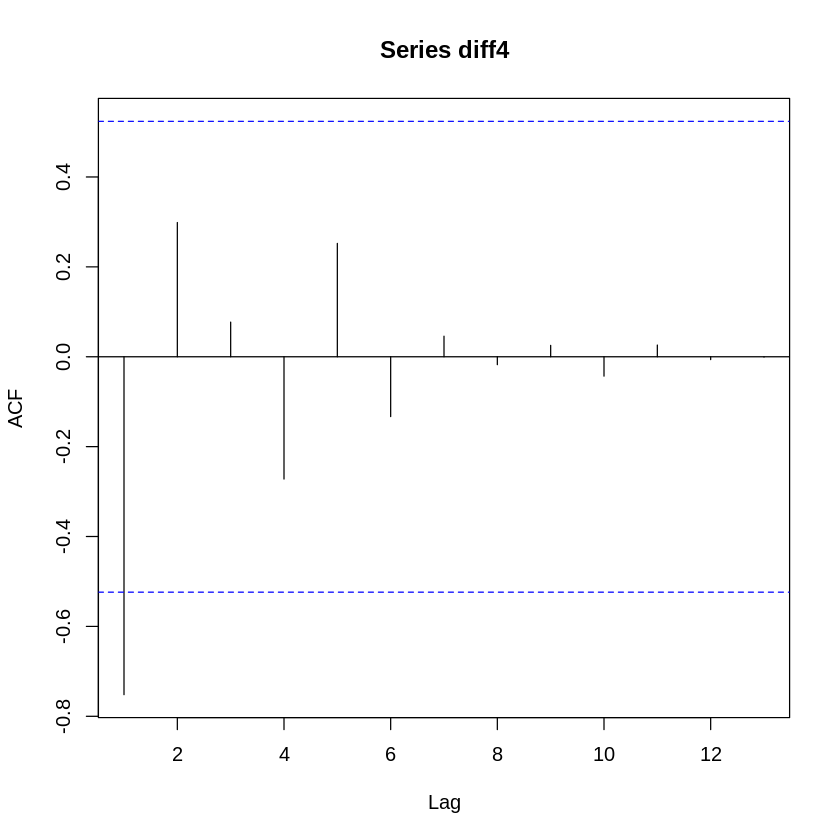

In [ ]:
acf(diff4, lag.max = 20)

# significant until lag 1

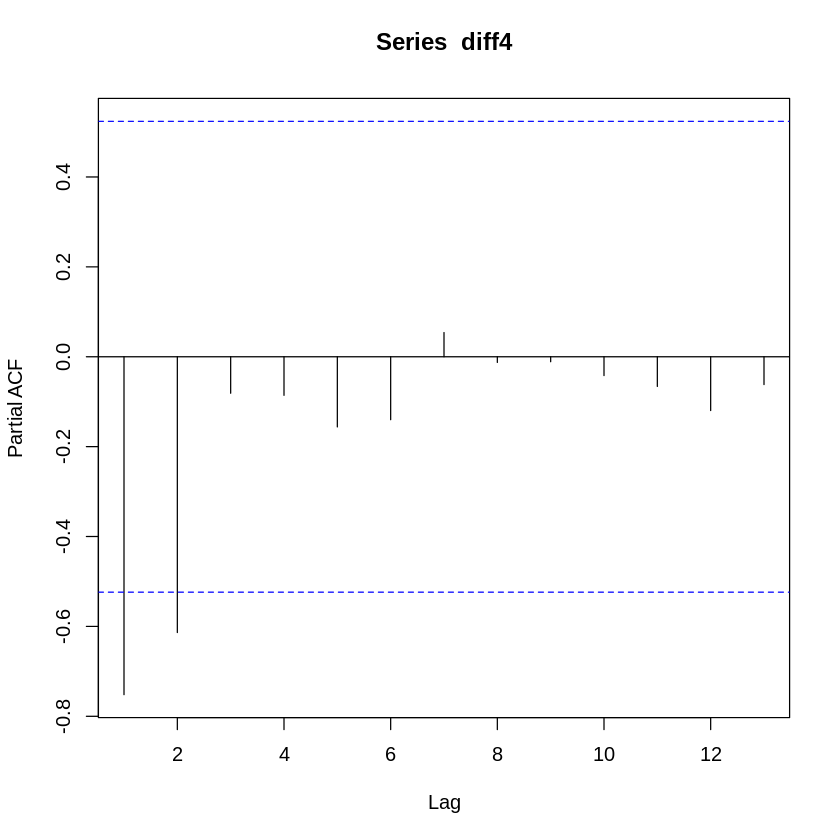

In [ ]:
pacf(diff4, lag.max = 20)

# significant until lag 2

#### Model Building and Significance Test
Max values for each order are:
* p = 2
* d = 4 [cannot be changed!]
* q = 1

##### Model 1 (1, 4, 0)

In [ ]:
model_arima_1 = arima(transformed, order = c(1, 4, 0))
model_arima_1


Call:
arima(x = transformed, order = c(1, 4, 0))

Coefficients:
          ar1
      -0.7082
s.e.   0.1640

sigma^2 estimated as 0.2069:  log likelihood = -12.21,  aic = 26.42

###### Significance Test

In [ ]:
coeftest(model_arima_1)

# All of them are significant


z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1 -0.70818    0.16403 -4.3173 1.579e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


##### Model 2 (0, 4, 1)

In [ ]:
model_arima_2 = arima(transformed, order = c(0, 4, 1))
model_arima_2


Call:
arima(x = transformed, order = c(0, 4, 1))

Coefficients:
          ma1
      -0.9819
s.e.   0.1917

sigma^2 estimated as 0.1484:  log likelihood = -10.71,  aic = 23.42

###### Significance Test

In [ ]:
coeftest(model_arima_2)

# All of them are significant


z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ma1 -0.98194    0.19175  -5.121 3.039e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


##### Model 3 (2, 4, 0)

In [ ]:
model_arima_3 = arima(transformed, order = c(2, 4, 0))
model_arima_3


Call:
arima(x = transformed, order = c(2, 4, 0))

Coefficients:
          ar1      ar2
      -1.3776  -0.8322
s.e.   0.1502   0.1374

sigma^2 estimated as 0.07463:  log likelihood = -6.24,  aic = 16.47

###### Significance Test

In [ ]:
coeftest(model_arima_3)

# All of them are significant


z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1 -1.37760    0.15018 -9.1728 < 2.2e-16 ***
ar2 -0.83221    0.13744 -6.0549 1.405e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


##### Model 4 (1, 4, 1)

In [ ]:
model_arima_4 = arima(transformed, order = c(1, 4, 1))
model_arima_4


Call:
arima(x = transformed, order = c(1, 4, 1))

Coefficients:
          ar1      ma1
      -0.6322  -0.9752
s.e.   0.1947   0.2222

sigma^2 estimated as 0.0826:  log likelihood = -7.24,  aic = 18.48

###### Significance Test

In [ ]:
coeftest(model_arima_4)

# All significant


z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1 -0.63220    0.19469 -3.2472  0.001165 ** 
ma1 -0.97521    0.22224 -4.3881 1.143e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


##### Model 5 (2, 4, 1)

In [ ]:
model_arima_5 = arima(transformed, order = c(2, 4, 1))
model_arima_5


Call:
arima(x = transformed, order = c(2, 4, 1))

Coefficients:
          ar1      ar2      ma1
      -1.2786  -0.7914  -0.9715
s.e.   0.1761   0.1558   0.2381

sigma^2 estimated as 0.0326:  log likelihood = -2.27,  aic = 10.54

###### Significance Test

In [ ]:
coeftest(model_arima_5)

# All significant


z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1 -1.27864    0.17612 -7.2602 3.865e-13 ***
ar2 -0.79137    0.15584 -5.0781 3.812e-07 ***
ma1 -0.97148    0.23808 -4.0806 4.493e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### Assumption Test

##### White Noise (No significant autocorrelation in the residuals)

###### Model 1

In [ ]:
Box.test(model_arima_1$residuals, type = "Ljung-Box")

# Reject null hypothesis
# Not white noise


	Box-Ljung test

data:  model_arima_1$residuals
X-squared = 5.2228, df = 1, p-value = 0.02229


###### Model 2

In [ ]:
Box.test(model_arima_2$residuals, type = "Ljung-Box")

# Reject null hypothesis
# Not white noise


	Box-Ljung test

data:  model_arima_2$residuals
X-squared = 8.6363, df = 1, p-value = 0.003295


###### Model 3

In [ ]:
Box.test(model_arima_3$residuals, type = "Ljung-Box")

# Fail to reject null hypothesis
# White noise


	Box-Ljung test

data:  model_arima_3$residuals
X-squared = 0.78257, df = 1, p-value = 0.3764


###### Model 4

In [ ]:
Box.test(model_arima_4$residuals, type = "Ljung-Box")

# Fail to reject null hypothesis
# White noise


	Box-Ljung test

data:  model_arima_4$residuals
X-squared = 1.8155, df = 1, p-value = 0.1778


###### Model 5

In [ ]:
Box.test(model_arima_5$residuals, type = "Ljung-Box")

# Fail to reject null hypothesis
# White noise


	Box-Ljung test

data:  model_arima_5$residuals
X-squared = 0.15837, df = 1, p-value = 0.6907


##### Normally Distributed

###### Model 1

In [ ]:
lillie.test(model_arima_1$residuals)

# Reject null hypothesis
# Not normally distributed


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  model_arima_1$residuals
D = 0.2421, p-value = 0.006515


###### Model 2

In [ ]:
lillie.test(model_arima_2$residuals)

# Reject null hypothesis
# Not normally distributed


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  model_arima_2$residuals
D = 0.22288, p-value = 0.01843


###### Model 3

In [ ]:
lillie.test(model_arima_3$residuals)

# Fail to reject null hypothesis
# Normally distributed


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  model_arima_3$residuals
D = 0.12642, p-value = 0.627


###### Model 4

In [ ]:
lillie.test(model_arima_4$residuals)

# Reject null hypothesis
# Not normally distributed


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  model_arima_4$residuals
D = 0.23546, p-value = 0.009444


###### Model 5

In [ ]:
lillie.test(model_arima_5$residuals)

# Reject null hypothesis
# Not normally distributed


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  model_arima_5$residuals
D = 0.21165, p-value = 0.03218


#### Model Evaluation

##### Model 3

In [ ]:
res_arima_3 = exp(model_arima_3$residuals)

rmse_model_arima_3 = sqrt(mean(res_arima_3^2))
mae_model_arima_3 = mean(abs(res_arima_3))
mape_model_arima_3 = mean(abs(res_arima_3/training)) * 100
mdae_model_arima_3 = median(abs(res_arima_3))

eval_model_arima_3 = c(rmse_model_arima_3, mae_model_arima_3, mape_model_arima_3, mdae_model_arima_3)

data.frame(eval_names, eval_model_arima_3)

eval_names,eval_model_arima_3
<chr>,<dbl>
RMSE,1.103696
MAE,1.070965
MAPE,5.364759
MDAE,1.003196


#### Testing Prediction & Evaluation

##### Model 3

###### Prediction

In [ ]:
predict_arima_3 = predict(model_arima_3, n.ahead = length(testing))
predict_arima_3

$pred
Time Series:
Start = 2016 
End = 2023 
Frequency = 1 
[1] 2.028947 2.083429 2.258299 2.586521 3.139961 3.891649 4.918397 6.236301

$se
Time Series:
Start = 2016 
End = 2023 
Frequency = 1 
[1]  0.2731766  0.7666956  1.7002218  3.2559617  5.5325079  8.7857858 13.1782027
[8] 18.9160453

In [ ]:
predict_values_arima_3 = exp(predict_arima_3$pred)
predict_values_arima_3

A Time Series:
[1]   7.606070   8.031966   9.566804  13.283474  23.102968  48.991595 136.783235
[8] 510.964782

###### Evaluation

In [ ]:
rmse_arima_3 = rmse(testing, predict_values_arima_3)
mae_arima_3 = mae(testing, predict_values_arima_3)
mape_arima_3 = mape(testing, predict_values_arima_3)
mdae_arima_3 = mdae(testing, predict_values_arima_3)

eval_arima_3 = c(rmse_arima_3, mae_arima_3, mape_arima_3, mdae_arima_3)

data.frame(eval_names, eval_arima_3)

eval_names,eval_arima_3
<chr>,<dbl>
RMSE,186.98909
MAE,90.34136
MAPE,42.84265
MDAE,14.09322


#### Forecast 1 Year

##### Model 1

In [ ]:
forecast_arima_1 = exp(predict(model_arima_1, n.ahead = length(testing)+1)$pred[length(testing)+1])
forecast_arima_1

[1] 9.884014

##### Model 2

In [ ]:
forecast_arima_2 = exp(predict(model_arima_2, n.ahead = length(testing)+1)$pred[length(testing)+1])
forecast_arima_2

[1] 23.23754

##### Model 3

In [ ]:
forecast_arima_3 = exp(predict(model_arima_3, n.ahead = length(testing)+1)$pred[length(testing)+1])
forecast_arima_3

[1] 23.49231

### Time Series Regression Model [DONE]

#### Model 1 (Linear Trend)

In [ ]:
df_train$t = seq(1:n_train)
names(df_train)[names(df_train) == "Poverty Ratio (%)"] <- "PovertyRatio"

head(df_train)

Year,PovertyRatio,t
<chr>,<dbl>,<int>
1998,69.1,1
1999,46.0,2
2000,43.6,3
2001,39.9,4
2002,26.8,5
2003,26.4,6


In [ ]:
df_test$t = seq((n_train+1),(n_train+length(testing)))
names(df_test)[names(df_test) == "Poverty Ratio (%)"] <- "PovertyRatio"

head(df_test)

Year,PovertyRatio,t
<chr>,<dbl>,<int>
2016,7.5,19
2017,6.6,20
2018,5.4,21
2019,4.4,22
2020,3.8,23
2021,3.5,24


In [ ]:
model_tsr_1 = lm(PovertyRatio ~ t, data = df_train)
model_tsr_1


Call:
lm(formula = PovertyRatio ~ t, data = df_train)

Coefficients:
(Intercept)            t  
     51.109       -2.565  


##### Significance Test (t and F)

In [ ]:
summary(model_tsr_1)

# Everything is significant (both t and F)


Call:
lm(formula = PovertyRatio ~ t, data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4856  -0.7783   0.5144   1.6247  20.5556 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  51.1092     3.3530   15.24 6.00e-11 ***
t            -2.5647     0.3098   -8.28 3.54e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.818 on 16 degrees of freedom
Multiple R-squared:  0.8108,	Adjusted R-squared:  0.7989 
F-statistic: 68.55 on 1 and 16 DF,  p-value: 3.542e-07


##### Assumption Test

In [ ]:
dwtest(model_tsr_1, alternative = "two.sided")

# Reject null hypothesis
# Have autocorrelation


	Durbin-Watson test

data:  model_tsr_1
DW = 0.85894, p-value = 0.002268
alternative hypothesis: true autocorrelation is not 0


In [ ]:
bptest(model_tsr_1)

# Reject null hypothesis
# Heteroscedasticity


	studentized Breusch-Pagan test

data:  model_tsr_1
BP = 4.2903, df = 1, p-value = 0.03833


In [ ]:
lillie.test(model_tsr_1$residuals)

# Reject null hypothesis
# Not normally distributed


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  model_tsr_1$residuals
D = 0.25042, p-value = 0.004015


#### Model 2 (Exponential Trend)

In [ ]:
df_train$lnY = log(df_train$PovertyRatio)
head(df_train)

Year,PovertyRatio,t,lnY
<chr>,<dbl>,<int>,<dbl>
1998,69.1,1,4.235555
1999,46.0,2,3.828641
2000,43.6,3,3.775057
2001,39.9,4,3.686376
2002,26.8,5,3.288402
2003,26.4,6,3.273364


In [ ]:
df_test$lnY = log(df_test$PovertyRatio)
head(df_test)

Year,PovertyRatio,t,lnY
<chr>,<dbl>,<int>,<dbl>
2016,7.5,19,2.014903
2017,6.6,20,1.887070
2018,5.4,21,1.686399
2019,4.4,22,1.481605
2020,3.8,23,1.335001
2021,3.5,24,1.252763


In [ ]:
model_tsr_2 = lm(lnY ~ t, data = df_train)
model_tsr_2


Call:
lm(formula = lnY ~ t, data = df_train)

Coefficients:
(Intercept)            t  
     4.1035      -0.1014  


##### Significance Test (t and F)

In [ ]:
summary(model_tsr_2)

# Everything is significant (both t and F)


Call:
lm(formula = lnY ~ t, data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30817 -0.09587 -0.01795  0.13331  0.23341 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.103545   0.081590   50.30  < 2e-16 ***
t           -0.101395   0.007538  -13.45 3.87e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1659 on 16 degrees of freedom
Multiple R-squared:  0.9188,	Adjusted R-squared:  0.9137 
F-statistic:   181 on 1 and 16 DF,  p-value: 3.868e-10


##### Assumption Test

In [ ]:
dwtest(model_tsr_2, alternative = "two.sided")

# Reject null hypothesis
# Have autocorrelation


	Durbin-Watson test

data:  model_tsr_2
DW = 0.79524, p-value = 0.001147
alternative hypothesis: true autocorrelation is not 0


In [ ]:
bptest(model_tsr_2)

# Accept null hypothesis
# Homoscedasticity


	studentized Breusch-Pagan test

data:  model_tsr_2
BP = 0.90616, df = 1, p-value = 0.3411


In [ ]:
lillie.test(model_tsr_2$residuals)

# Accept null hypothesis
# Normally distributed


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  model_tsr_2$residuals
D = 0.10814, p-value = 0.8357


#### Model 3 (Quadratic Trend)

In [ ]:
df_train$t2 = (df_train$t)^2
head(df_train)

Year,PovertyRatio,t,lnY,t2
<chr>,<dbl>,<int>,<dbl>,<dbl>
1998,69.1,1,4.235555,1
1999,46.0,2,3.828641,4
2000,43.6,3,3.775057,9
2001,39.9,4,3.686376,16
2002,26.8,5,3.288402,25
2003,26.4,6,3.273364,36


In [ ]:
df_test$t2 = (df_test$t)^2
head(df_test)

Year,PovertyRatio,t,lnY,t2
<chr>,<dbl>,<int>,<dbl>,<dbl>
2016,7.5,19,2.014903,361
2017,6.6,20,1.887070,400
2018,5.4,21,1.686399,441
2019,4.4,22,1.481605,484
2020,3.8,23,1.335001,529
2021,3.5,24,1.252763,576


In [ ]:
model_tsr_3 = lm(PovertyRatio ~ t + t2, data = df_train)
model_tsr_3


Call:
lm(formula = PovertyRatio ~ t + t2, data = df_train)

Coefficients:
(Intercept)            t           t2  
    60.3914      -5.3494       0.1466  


##### Significance Test (t and F)

In [ ]:
summary(model_tsr_3)

# Everything is significant (both t and F)


Call:
lm(formula = PovertyRatio ~ t + t2, data = df_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.508  -2.973  -1.280   3.405  13.911 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 60.39142    4.68113  12.901  1.6e-09 ***
t           -5.34939    1.13438  -4.716 0.000276 ***
t2           0.14656    0.05801   2.526 0.023265 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.898 on 15 degrees of freedom
Multiple R-squared:  0.8672,	Adjusted R-squared:  0.8495 
F-statistic:    49 on 2 and 15 DF,  p-value: 2.648e-07


##### Assumption Test

In [ ]:
dwtest(model_tsr_3, alternative = "two.sided")

# Reject null hypothesis
# Have autocorrelation


	Durbin-Watson test

data:  model_tsr_3
DW = 1.0498, p-value = 0.003975
alternative hypothesis: true autocorrelation is not 0


In [ ]:
bptest(model_tsr_3)

# Reject null hypothesis
# Heteroscedasticity


	studentized Breusch-Pagan test

data:  model_tsr_3
BP = 6.0992, df = 2, p-value = 0.04738


In [ ]:
lillie.test(model_tsr_3$residuals)

# Accept null hypothesis
# Normally distributed


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  model_tsr_3$residuals
D = 0.13574, p-value = 0.5124


#### Model 4 (Lag 1)

In [ ]:
yt = df_train$PovertyRatio[2:n_train]
t = df_train$t[2:n_train]
yt_lag1 = df_train$PovertyRatio[1:(n_train-1)]

data_tsr_4 = data.frame(yt, t, yt_lag1)

In [ ]:
model_tsr_4 = lm(yt ~ t + yt_lag1, data = data_tsr_4)
model_tsr_4


Call:
lm(formula = yt ~ t + yt_lag1, data = data_tsr_4)

Coefficients:
(Intercept)            t      yt_lag1  
    29.2329      -1.3261       0.2976  


##### Significance Test (t and F)

In [ ]:
summary(model_tsr_4)

# Everything are significant


Call:
lm(formula = yt ~ t + yt_lag1, data = data_tsr_4)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6751 -0.8920 -0.3132  0.3304  5.9819 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.2329     6.7666   4.320 0.000705 ***
t            -1.3261     0.3560  -3.725 0.002264 ** 
yt_lag1       0.2976     0.1203   2.472 0.026856 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.251 on 14 degrees of freedom
Multiple R-squared:  0.9272,	Adjusted R-squared:  0.9167 
F-statistic:  89.1 on 2 and 14 DF,  p-value: 1.088e-08


##### Assumption Test

In [ ]:
dwtest(model_tsr_4, alternative = "two.sided")

# Accept null hypothesis
# Does not have autocorrelation


	Durbin-Watson test

data:  model_tsr_4
DW = 1.9643, p-value = 0.5689
alternative hypothesis: true autocorrelation is not 0


In [ ]:
bptest(model_tsr_4)

# Accept null hypothesis
# Homoscedasticity


	studentized Breusch-Pagan test

data:  model_tsr_4
BP = 4.1118, df = 2, p-value = 0.128


In [ ]:
lillie.test(model_tsr_4$residuals)

# Reject null hypothesis
# Not normally distributed


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  model_tsr_4$residuals
D = 0.22144, p-value = 0.0263


#### Model 5 (Lag 2)

In [ ]:
yt5 = df_train$PovertyRatio[3:n_train]
t5 = df_train$t[3:n_train]
yt5_lag1 = df_train$PovertyRatio[2:(n_train-1)]
yt5_lag2 = df_train$PovertyRatio[1:(n_train-2)]

data_tsr_5 = data.frame(yt5, t5, yt5_lag1, yt5_lag2)

In [ ]:
model_tsr_5 = lm(yt5 ~ t5 + yt5_lag1 + yt5_lag2, data = data_tsr_5)
model_tsr_5


Call:
lm(formula = yt5 ~ t5 + yt5_lag1 + yt5_lag2, data = data_tsr_5)

Coefficients:
(Intercept)           t5     yt5_lag1     yt5_lag2  
    21.8574      -0.9912       0.3112       0.1237  


##### Significance Test (t and F)

In [ ]:
summary(model_tsr_5)

# Nothing is significant


Call:
lm(formula = yt5 ~ t5 + yt5_lag1 + yt5_lag2, data = data_tsr_5)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9117 -0.9150 -0.1296  0.9797  6.6676 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  21.8574    11.2523   1.942   0.0759 .
t5           -0.9912     0.5301  -1.870   0.0861 .
yt5_lag1      0.3112     0.2753   1.131   0.2803  
yt5_lag2      0.1237     0.1491   0.830   0.4228  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.348 on 12 degrees of freedom
Multiple R-squared:  0.912,	Adjusted R-squared:   0.89 
F-statistic: 41.46 on 3 and 12 DF,  p-value: 1.308e-06


### Neural Network [DONE]



#### NNETAR Models

##### Model 1 (p = 1, size = 5)

In [ ]:
model_nnet_1 = nnetar(training, p = 1, size = 5)
model_nnet_1

Series: training 
Model:  NNAR(1,5) 
Call:   nnetar(y = training, p = 1, size = 5)

Average of 20 networks, each of which is
a 1-5-1 network with 16 weights
options were - linear output units 

sigma^2 estimated as 3.274

In [ ]:
fit_nnet_1 = model_nnet_1$fitted
fit_nnet_1

A Time Series:
 [1]        NA 45.992941 43.716326 39.771522 26.877863 26.298662 26.147850
 [8] 26.351574 24.751351 24.877343 25.342426 24.858021 19.548952 15.727458
[15] 12.923595 11.230493  9.502049  8.391987

In [ ]:
rmse_model_nnet_1 = rmse(training[2:18], fit_nnet_1[2:18])
mae_model_nnet_1 = mae(training[2:18], fit_nnet_1[2:18])
mape_model_nnet_1 = mape(training[2:18], fit_nnet_1[2:18])
mdae_model_nnet_1 = mdae(training[2:18], fit_nnet_1[2:18])

eval_model_nnet_1 = c(rmse_model_nnet_1, mae_model_nnet_1, mape_model_nnet_1, mdae_model_nnet_1)

data.frame(eval_names, eval_model_nnet_1)

eval_names,eval_model_nnet_1
<chr>,<dbl>
RMSE,1.80948622
MAE,0.94611080
MAPE,0.04067117
MDAE,0.20204869


In [ ]:
predict_values_nnet_1 = forecast(model_nnet_1, h = length(testing))$mean
predict_values_nnet_1

A Time Series:
[1] 7.860879 7.637481 7.525963 7.470813 7.443665 7.430331 7.423790 7.420583

In [ ]:
rmse_nnet_1 = rmse(testing, predict_values_nnet_1)
mae_nnet_1 = mae(testing, predict_values_nnet_1)
mape_nnet_1 = mape(testing, predict_values_nnet_1)
mdae_nnet_1 = mdae(testing, predict_values_nnet_1)

eval_nnet_1 = c(rmse_nnet_1, mae_nnet_1, mape_nnet_1, mdae_nnet_1)

data.frame(eval_names, eval_nnet_1)

eval_names,eval_nnet_1
<chr>,<dbl>
RMSE,3.510708
MAE,3.076688
MAPE,1.031727
MDAE,3.357239


In [ ]:
forecast_nnet_1 = tail(forecast(model_nnet_1, h = length(testing)+1)$mean, 1)
forecast_nnet_1

A Time Series:
[1] 7.41901

##### Model 2 (p = 2, size = 5)

In [ ]:
model_nnet_2 = nnetar(training, p = 2, size = 5)
model_nnet_2

Series: training 
Model:  NNAR(2,5) 
Call:   nnetar(y = training, p = 2, size = 5)

Average of 20 networks, each of which is
a 2-5-1 network with 21 weights
options were - linear output units 

sigma^2 estimated as 1.86

In [ ]:
fit_nnet_2 = model_nnet_2$fitted
fit_nnet_2

A Time Series:
 [1]        NA        NA 43.609289 39.887017 26.822035 26.308562 26.304699
 [8] 25.885653 26.235641 24.881322 26.495606 23.169170 18.730765 15.449113
[15] 13.360695 11.274553  9.706379  8.223787

In [ ]:
rmse_model_nnet_2 = rmse(training[3:18], fit_nnet_2[3:18])
mae_model_nnet_2 = mae(training[3:18], fit_nnet_2[3:18])
mape_model_nnet_2 = mape(training[3:18], fit_nnet_2[3:18])
mdae_model_nnet_2 = mdae(training[3:18], fit_nnet_2[3:18])

eval_model_nnet_2 = c(rmse_model_nnet_2, mae_model_nnet_2, mape_model_nnet_2, mdae_model_nnet_2)

data.frame(eval_names, eval_model_nnet_2)

eval_names,eval_model_nnet_2
<chr>,<dbl>
RMSE,1.36391598
MAE,0.77141333
MAPE,0.03362014
MDAE,0.32899120


In [ ]:
predict_values_nnet_2 = forecast(model_nnet_2, h = length(testing))$mean
predict_values_nnet_2

A Time Series:
[1] 7.262433 6.697520 6.209714 5.921788 5.696648 5.556728 5.453293 5.386866

In [ ]:
rmse_nnet_2 = rmse(testing, predict_values_nnet_2)
mae_nnet_2 = mae(testing, predict_values_nnet_2)
mape_nnet_2 = mape(testing, predict_values_nnet_2)
mdae_nnet_2 = mdae(testing, predict_values_nnet_2)

eval_nnet_2 = c(rmse_nnet_2, mae_nnet_2, mape_nnet_2, mdae_nnet_2)

data.frame(eval_names, eval_nnet_2)

eval_names,eval_nnet_2
<chr>,<dbl>
RMSE,1.9920156
MAE,1.6325157
MAPE,0.5806905
MDAE,1.7092181


In [ ]:
forecast_nnet_2 = tail(forecast(model_nnet_2, h = length(testing)+1)$mean, 1)
forecast_nnet_2

A Time Series:
[1] 5.33935

##### Model 3 (p = 1, size = 8)

In [ ]:
model_nnet_3 = nnetar(training, p = 1, size = 8)
model_nnet_3

Series: training 
Model:  NNAR(1,8) 
Call:   nnetar(y = training, p = 1, size = 8)

Average of 20 networks, each of which is
a 1-8-1 network with 25 weights
options were - linear output units 

sigma^2 estimated as 3.213

In [ ]:
fit_nnet_3 = model_nnet_3$fitted
fit_nnet_3

A Time Series:
 [1]        NA 46.008907 43.738068 39.732172 26.933780 26.222332 26.128790
 [8] 26.245039 24.859875 24.879318 25.437072 24.966294 19.371052 15.599566
[15] 13.030595 11.410715  9.554518  8.196371

In [ ]:
rmse_model_nnet_3 = rmse(training[2:18], fit_nnet_3[2:18])
mae_model_nnet_3 = mae(training[2:18], fit_nnet_3[2:18])
mape_model_nnet_3 = mape(training[2:18], fit_nnet_3[2:18])
mdae_model_nnet_3 = mdae(training[2:18], fit_nnet_3[2:18])

eval_model_nnet_3 = c(rmse_model_nnet_3, mae_model_nnet_3, mape_model_nnet_3, mdae_model_nnet_3)

data.frame(eval_names, eval_model_nnet_3)

eval_names,eval_model_nnet_3
<chr>,<dbl>
RMSE,1.7923666
MAE,0.9597898
MAPE,0.0417590
MDAE,0.2545183


In [ ]:
predict_values_nnet_3 = forecast(model_nnet_3, h = length(testing))$mean
predict_values_nnet_3

A Time Series:
[1] 7.491813 6.926862 6.534360 6.262896 6.075760 5.947061 5.858699 5.798101

In [ ]:
rmse_nnet_3 = rmse(testing, predict_values_nnet_3)
mae_nnet_3 = mae(testing, predict_values_nnet_3)
mape_nnet_3 = mape(testing, predict_values_nnet_3)
mdae_nnet_3 = mdae(testing, predict_values_nnet_3)

eval_nnet_3 = c(rmse_nnet_3, mae_nnet_3, mape_nnet_3, mdae_nnet_3)

data.frame(eval_names, eval_nnet_3)

eval_names,eval_nnet_3
<chr>,<dbl>
RMSE,2.3050841
MAE,1.9139908
MAPE,0.6721531
MDAE,2.0693278


In [ ]:
forecast_nnet_3 = tail(forecast(model_nnet_3, h = length(testing)+1)$mean, 1)
forecast_nnet_3

A Time Series:
[1] 5.756578

##### Model 4 (p = 3, size = 10)

In [ ]:
model_nnet_4 = nnetar(training, p = 3, size = 10)
model_nnet_4

Series: training 
Model:  NNAR(3,10) 
Call:   nnetar(y = training, p = 3, size = 10)

Average of 20 networks, each of which is
a 3-10-1 network with 51 weights
options were - linear output units 

sigma^2 estimated as 0.0376

In [ ]:
fit_nnet_4 = model_nnet_4$fitted
fit_nnet_4

A Time Series:
 [1]        NA        NA        NA 39.919023 26.773055 26.419863 26.992964
 [8] 25.099606 30.277069 25.046367 24.645194 20.960050 18.405043 15.786957
[15] 13.396001 11.366192  9.153297  8.442438

In [ ]:
rmse_model_nnet_4 = rmse(training[4:18], fit_nnet_4[4:18])
mae_model_nnet_4 = mae(training[4:18], fit_nnet_4[4:18])
mape_model_nnet_4 = mape(training[4:18], fit_nnet_4[4:18])
mdae_model_nnet_4 = mdae(training[4:18], fit_nnet_4[4:18])

eval_model_nnet_4 = c(rmse_model_nnet_4, mae_model_nnet_4, mape_model_nnet_4, mdae_model_nnet_4)

data.frame(eval_names, eval_model_nnet_4)

eval_names,eval_model_nnet_4
<chr>,<dbl>
RMSE,0.193918628
MAE,0.139675007
MAPE,0.008321209
MDAE,0.105043353


In [ ]:
predict_values_nnet_4 = forecast(model_nnet_4, h = length(testing))$mean
predict_values_nnet_4

A Time Series:
[1] 7.101329 5.985796 5.893967 5.635226 4.746500 4.834097 5.231445 4.404348

In [ ]:
rmse_nnet_4 = rmse(testing, predict_values_nnet_4)
mae_nnet_4 = mae(testing, predict_values_nnet_4)
mape_nnet_4 = mape(testing, predict_values_nnet_4)
mdae_nnet_4 = mdae(testing, predict_values_nnet_4)

eval_nnet_4 = c(rmse_nnet_4, mae_nnet_4, mape_nnet_4, mdae_nnet_4)

data.frame(eval_names, eval_nnet_4)

eval_names,eval_nnet_4
<chr>,<dbl>
RMSE,1.5294689
MAE,1.2823073
MAPE,0.4449164
MDAE,1.0908630


In [ ]:
forecast_nnet_4 = tail(forecast(model_nnet_4, h = length(testing)+1)$mean, 1)
forecast_nnet_4

A Time Series:
[1] 4.235969

##### Model 5 (p = 5, size = 10)

In [ ]:
model_nnet_5 = nnetar(training, p = 5, size = 10)
model_nnet_5

Series: training 
Model:  NNAR(5,10) 
Call:   nnetar(y = training, p = 5, size = 10)

Average of 20 networks, each of which is
a 5-10-1 network with 71 weights
options were - linear output units 

sigma^2 estimated as 0.0001139

In [ ]:
fit_nnet_5 = model_nnet_5$fitted
fit_nnet_5

A Time Series:
 [1]        NA        NA        NA        NA        NA 26.402084 27.005821
 [8] 24.598645 30.594278 25.199282 24.697907 20.999316 18.302859 15.702810
[15] 13.681443 11.197218  9.330106  8.288687

In [ ]:
rmse_model_nnet_5 = rmse(training[6:18], fit_nnet_5[6:18])
mae_model_nnet_5 = mae(training[6:18], fit_nnet_5[6:18])
mape_model_nnet_5 = mape(training[6:18], fit_nnet_5[6:18])
mdae_model_nnet_5 = mdae(training[6:18], fit_nnet_5[6:18])

eval_model_nnet_5 = c(rmse_model_nnet_5, mae_model_nnet_5, mape_model_nnet_5, mdae_model_nnet_5)

data.frame(eval_names, eval_model_nnet_5)

eval_names,eval_model_nnet_5
<chr>,<dbl>
RMSE,0.0106724631
MAE,0.0066849905
MAPE,0.0005554477
MDAE,0.0028103159


In [ ]:
predict_values_nnet_5 = forecast(model_nnet_5, h = length(testing))$mean
predict_values_nnet_5

A Time Series:
[1]  7.793544  7.768672  8.610691  9.612160 10.478464 11.447865 12.167941
[8] 12.382534

In [ ]:
rmse_nnet_5 = rmse(testing, predict_values_nnet_5)
mae_nnet_5 = mae(testing, predict_values_nnet_5)
mape_nnet_5 = mape(testing, predict_values_nnet_5)
mdae_nnet_5 = mdae(testing, predict_values_nnet_5)

eval_nnet_5 = c(rmse_nnet_5, mae_nnet_5, mape_nnet_5, mdae_nnet_5)

data.frame(eval_names, eval_nnet_5)

eval_names,eval_nnet_5
<chr>,<dbl>
RMSE,6.614852
MAE,5.582734
MAPE,1.925997
MDAE,5.945312


In [ ]:
forecast_nnet_5 = tail(forecast(model_nnet_5, h = length(testing)+1)$mean, 1)
forecast_nnet_5

A Time Series:
[1] 12.43469

#### MLP Models

##### Model 1 (2, 5)

In [ ]:
model_nn_1 = mlp(training, hd = c(2, 5))
model_nn_1

MLP fit with (2,5) hidden nodes and 20 repetitions.
Series modelled in differences: D1.
Univariate lags: (4)
Forecast combined using the median operator.
MSE: 5.1248.

In [ ]:
fit_nn_1 = model_nn_1$fitted
fit_nn_1

A Time Series:
 [1] 28.605438 24.660331 25.518944 24.769594 28.528383 22.954788 22.960331
 [8] 18.031548 17.050915 13.643761 12.218944  9.521062  7.598679

In [ ]:
rmse_model_nn_1 = rmse(training, fit_nn_1)
mae_model_nn_1 = mae(training, fit_nn_1)
mape_model_nn_1 = mape(training, fit_nn_1)
mdae_model_nn_1 = mdae(training, fit_nn_1)

eval_model_nn_1 = c(rmse_model_nn_1, mae_model_nn_1, mape_model_nn_1, mdae_model_nn_1)

data.frame(eval_names, eval_model_nn_1)

eval_names,eval_model_nn_1
<chr>,<dbl>
RMSE,2.26379642
MAE,1.68810111
MAPE,0.07678717
MDAE,1.35091458


In [ ]:
predict_values_nn_1 = forecast(model_nn_1, h = length(testing))$mean
predict_values_nn_1

A Time Series:
       t+1        t+2        t+3        t+4        t+5        t+6        t+7 
 6.4923070  4.7755022  2.9497141  0.9636636 -0.8776544 -2.7329185 -4.5714608 
       t+8 
-6.3852476

In [ ]:
rmse_nn_1 = rmse(testing, predict_values_nn_1)
mae_nn_1 = mae(testing, predict_values_nn_1)
mape_nn_1 = mape(testing, predict_values_nn_1)
mdae_nn_1 = mdae(testing, predict_values_nn_1)

eval_nn_1 = c(rmse_nn_1, mae_nn_1, mape_nn_1, mdae_nn_1)

data.frame(eval_names, eval_nn_1)

eval_names,eval_nn_1
<chr>,<dbl>
RMSE,5.019178
MAE,4.373262
MAPE,1.480822
MDAE,4.056995


In [ ]:
forecast_nn_1 = tail(forecast(model_nn_1, h = length(testing))$mean, 1)
forecast_nn_1

A Time Series:
[1] -6.385248

##### Model 2 (3, 1)

In [ ]:
model_nn_2 = mlp(training, hd = c(3, 1))
model_nn_2

MLP fit with (3,1) hidden nodes and 20 repetitions.
Series modelled in differences: D1.
Univariate lags: (4)
Forecast combined using the median operator.
MSE: 4.4941.

In [ ]:
fit_nn_2 = model_nn_2$fitted
fit_nn_2

A Time Series:
 [1] 28.975149 24.535689 25.476952 25.711551 28.304374 22.715182 22.835689
 [8] 17.932217 17.212742 13.424772 12.176952  9.434789  7.503371

In [ ]:
rmse_model_nn_2 = rmse(training, fit_nn_2)
mae_model_nn_2 = mae(training, fit_nn_2)
mape_model_nn_2 = mape(training, fit_nn_2)
mdae_model_nn_2 = mdae(training, fit_nn_2)

eval_model_nn_2 = c(rmse_model_nn_2, mae_model_nn_2, mape_model_nn_2, mdae_model_nn_2)

data.frame(eval_names, eval_model_nn_2)

eval_names,eval_model_nn_2
<chr>,<dbl>
RMSE,2.11992774
MAE,1.67645115
MAPE,0.07764746
MDAE,1.51274171


In [ ]:
predict_values_nn_2 = forecast(model_nn_2, h = length(testing))$mean
predict_values_nn_2

A Time Series:
       t+1        t+2        t+3        t+4        t+5        t+6        t+7 
 6.3118234  4.4736603  2.4496876  0.1991209 -1.7922407 -3.8230876 -5.8067127 
       t+8 
-7.7234292

In [ ]:
rmse_nn_2 = rmse(testing, predict_values_nn_2)
mae_nn_2 = mae(testing, predict_values_nn_2)
mape_nn_2 = mape(testing, predict_values_nn_2)
mdae_nn_2 = mdae(testing, predict_values_nn_2)

eval_nn_2 = c(rmse_nn_2, mae_nn_2, mape_nn_2, mdae_nn_2)

data.frame(eval_names, eval_nn_2)

eval_names,eval_nn_2
<chr>,<dbl>
RMSE,5.903362
MAE,5.163897
MAPE,1.741662
MDAE,4.896560


In [ ]:
forecast_nn_2 = tail(forecast(model_nn_2, h = length(testing))$mean, 1)
forecast_nn_2

A Time Series:
[1] -7.723429

##### Model 3 (5, 2)

In [ ]:
model_nn_3 = mlp(y = training, hd = c(5, 2))
model_nn_3

MLP fit with (5,2) hidden nodes and 20 repetitions.
Series modelled in differences: D1.
Univariate lags: (4)
Forecast combined using the median operator.
MSE: 4.635.

In [ ]:
fit_nn_3 = model_nn_3$fitted
fit_nn_3

A Time Series:
 [1] 28.707270 24.606633 25.500524 25.437068 28.331481 22.694328 22.906633
 [8] 17.779553 17.228880 13.456913 12.200524  9.453506  7.537810

In [ ]:
rmse_model_nn_3 = rmse(training, fit_nn_3)
mae_model_nn_3 = mae(training, fit_nn_3)
mape_model_nn_3 = mape(training, fit_nn_3)
mdae_model_nn_3 = mdae(training, fit_nn_3)

eval_model_nn_3 = c(rmse_model_nn_3, mae_model_nn_3, mape_model_nn_3, mdae_model_nn_3)

data.frame(eval_names, eval_model_nn_3)

eval_names,eval_model_nn_3
<chr>,<dbl>
RMSE,2.15291622
MAE,1.69357788
MAPE,0.07837392
MDAE,1.52888016


In [ ]:
predict_values_nn_3 = forecast(model_nn_3, h = length(testing))$mean
predict_values_nn_3

A Time Series:
       t+1        t+2        t+3        t+4        t+5        t+6        t+7 
 6.4217257  4.6540822  2.7538125  0.6577547 -1.2473754 -3.1776013 -5.0777329 
       t+8 
-6.9332472

In [ ]:
rmse_nn_3 = rmse(testing, predict_values_nn_3)
mae_nn_3 = mae(testing, predict_values_nn_3)
mape_nn_3 = mape(testing, predict_values_nn_3)
mdae_nn_3 = mdae(testing, predict_values_nn_3)

eval_nn_3 = c(rmse_nn_3, mae_nn_3, mape_nn_3, mdae_nn_3)

data.frame(eval_names, eval_nn_3)

eval_names,eval_nn_3
<chr>,<dbl>
RMSE,5.379017
MAE,4.693573
MAPE,1.586933
MDAE,4.394810


In [ ]:
forecast_nn_3 = tail(forecast(model_nn_3, h = length(testing))$mean, 1)
forecast_nn_3

A Time Series:
[1] -6.933247